A notebook for developing the function find_quiet_periods

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

from keller_zlatic_vnc.data_processing import find_quiet_periods
from keller_zlatic_vnc.data_processing import read_full_annotations

import matplotlib.patches as patches
import matplotlib.pyplot as plt

In [3]:
#%matplotlib notebook

In [4]:
# Folder holding annotation data
annot_folder = r'A:/projects/keller_vnc/data/full_annotations/em_volume_behavior_csv'

# Annotation file
annot_file = '18-02-15L1-behavior-ol.csv'

In [5]:
full_annotations = read_full_annotations(Path(annot_folder) / annot_file)

In [13]:
quiet_annots = find_quiet_periods(full_annotations, q_th=10, q_start_offset=1, q_end_offset=1)

(7688.0, 7710.0)

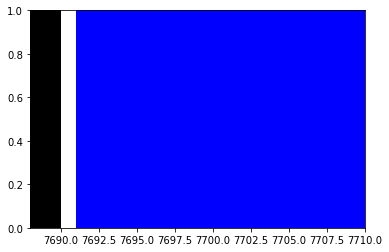

In [16]:
plt.figure()
ax = plt.subplot(1,1,1)

for start, end in zip(full_annotations.start, full_annotations.end):
    rect = patches.Rectangle((start, 0), end-start, 1, facecolor='k')
    ax.add_patch(rect)

for _, item in quiet_annots.iterrows():
    rect = patches.Rectangle((item['start'], 0), item['end']-item['start'], 1, facecolor='b')
    ax.add_patch(rect)
    
plt.xlim(7688, 7710)

In [18]:
quiet_annots[quiet_annots['start'] > 7000]

,start,end,beh
89,7066,7305,Q
90,7313,7639,Q
91,7691,7786,Q
92,7988,8012,Q
93,8046,8075,Q
94,8085,8100,Q
95,8143,8156,Q
96,8226,8254,Q
97,8277,8799,Q
98,8835,8847,Q


In [19]:
full_annotations[full_annotations['start'] > 7000]

,start,end,beh
422,7060,7065,S
423,7306,7312,TR
424,7640,7654,S
425,7657,7665,F
426,7672,7679,P
...,...,...,...
500,10090,10102,F
501,10128,10136,P
502,10137,10145,P
503,10146,10156,F
